## Problem Statement (KAATRU - IIT MADRAS)
****
* Goal:

Develop a model to find the variables that are significant in the demand for shared bikes with the available independent variables and report appropriate metrics of your model evaluation.

* Outcome:

The variables that are significant in predicting the demand for shared bikes (at least 3).
****


In [1]:
# importing the necessary packages

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing the dataset
data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Attribute Information:
*****
- **instant**: record index
- **dteday** : date
- **season** : season 

        1: winter
                
        2: spring
        
        3: summer
        
        4: fall
- **yr** : year 
        
        0: 2011
        
        1: 2012
- **mnth** : month ( 1 to 12)
- **hr** : hour (0 to 23)
- **holiday** : weather day is holiday or not.
- **weekday** : day of the week
- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
+ **weathersit** :

        1: Clear, Few clouds, Partly cloudy, Partly cloudy
 
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp** : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- **atemp**: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- **hum**: Normalized humidity. The values are divided to 100 (max)
- **windspeed**: Normalized wind speed. The values are divided to 67 (max)
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered
****

**References**: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset#


## Data Preprocessing and Exploratory Data Analysis:
***

In [3]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# Description of the dataset
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Checking for missing values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Checking for duplicate values
data.duplicated().sum()

0

#### Observations:
*******
- shape of the data is (730, 16).
- Majority of the data is in Numeric format.
- No Null Values Present
- No duplicate values present
- There are 4 season in season column which are in Numeric representation as 1,2,3,4.
        
        1:winter
        
        2:spring
        
        3:summer
        
        4:fall
- There are 4 different types of weather in weathersit column which are in Numeric representation as 1,2,3,4.
        
        1: Clear, Few clouds, Partly cloudy, Partly cloudy
 
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- Other variable such as year,month,temprature,humidity,windspeed,total_count
************

#### Removing the variables that are not significant in predicting:

Baesd on Data I donot require the following variables:
1. instant
2. dteday
3. Casual
4. Registered

**instant**: record index(there is no specific need for this variable)

**dteday**: date(We already have year and month)

**Casual**, **Registered**: count of casual users, registered users(Because we have total count and goal is to find the variables that are significant in predicting the demand for shared bikes)
****

In [7]:
# removing the variables that are not required
data.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

In [8]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
print("Seasons Value Counts:")
print(data['season'].value_counts(ascending=False))
print("*" * 50)
print("Month Value Counts:")
print(data['mnth'].value_counts(ascending=False))
print("*" * 50)


Seasons Value Counts:
3    188
2    184
1    180
4    178
Name: season, dtype: int64
**************************************************
Month Value Counts:
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
**************************************************


In [10]:
print("Weekday Value Counts:")
print(data['weekday'].value_counts(ascending=False))
print("*" * 50)
print("Weather Value Counts:")
print(data['weathersit'].value_counts(ascending=False))
print("*" * 50)

Weekday Value Counts:
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64
**************************************************
Weather Value Counts:
1    463
2    246
3     21
Name: weathersit, dtype: int64
**************************************************


In [11]:
print("Season W.R.T to Total Counts:")
data.groupby(['season']).agg({'cnt':'sum'})

Season W.R.T to Total Counts:


,cnt
season,
1,469514
2,918589
3,1061129
4,841613


In [12]:
print("Year W.R.T to Total Counts:")
data.groupby(['yr']).agg({'cnt':'sum'})

Year W.R.T to Total Counts:


,cnt
yr,
0,1243103
1,2047742


In [13]:
print("Month W.R.T to Total Counts:")
data.groupby(['mnth']).agg({'cnt':'sum'})

Month W.R.T to Total Counts:


,cnt
mnth,
1,134933
2,149518
3,228920
4,269094
5,331686
6,346342
7,344948
8,351194
9,345991


In [14]:
print("In which year and season the most number of bikes were taken:")
data.groupby(['season','yr']).agg({'cnt':'sum'})

In which year and season the most number of bikes were taken:


cnt
season yr        
1      0   150000
       1   319514
2      0   347316
       1   571273
3      0   419650
       1   641479
4      0   326137
       1   515476

In [15]:
print("Holiday W.R.T to Total Counts:")
data.groupby(['season','workingday']).agg({'cnt':'sum'})

Holiday W.R.T to Total Counts:


cnt
season workingday        
1      0           158866
       1           310648
2      0           288937
       1           629652
3      0           330743
       1           730386
4      0           258311
       1           583302

In [16]:
print("Weather W.R.T to Total Counts:")
data.groupby(['weathersit']).agg({'cnt':'sum'})

Weather W.R.T to Total Counts:


,cnt
weathersit,
1,2257952
2,995024
3,37869


In [17]:
print("Season and weather W.R.T to Total Counts:")
data.groupby(['season','weathersit']).agg({'cnt':'sum'})

Season and weather W.R.T to Total Counts:


cnt
season weathersit        
1      1           312036
       2           153739
       3             3739
2      1           626986
       2           288096
       3             3507
3      1           799443
       2           250679
       3            11007
4      1           519487
       2           302510
       3            19616

In [18]:
print("Holidays W.R.T to Total Counts:")
data.groupby(['holiday']).agg({'cnt':'sum'})

Holidays W.R.T to Total Counts:


,cnt
holiday,
0,3212410
1,78435


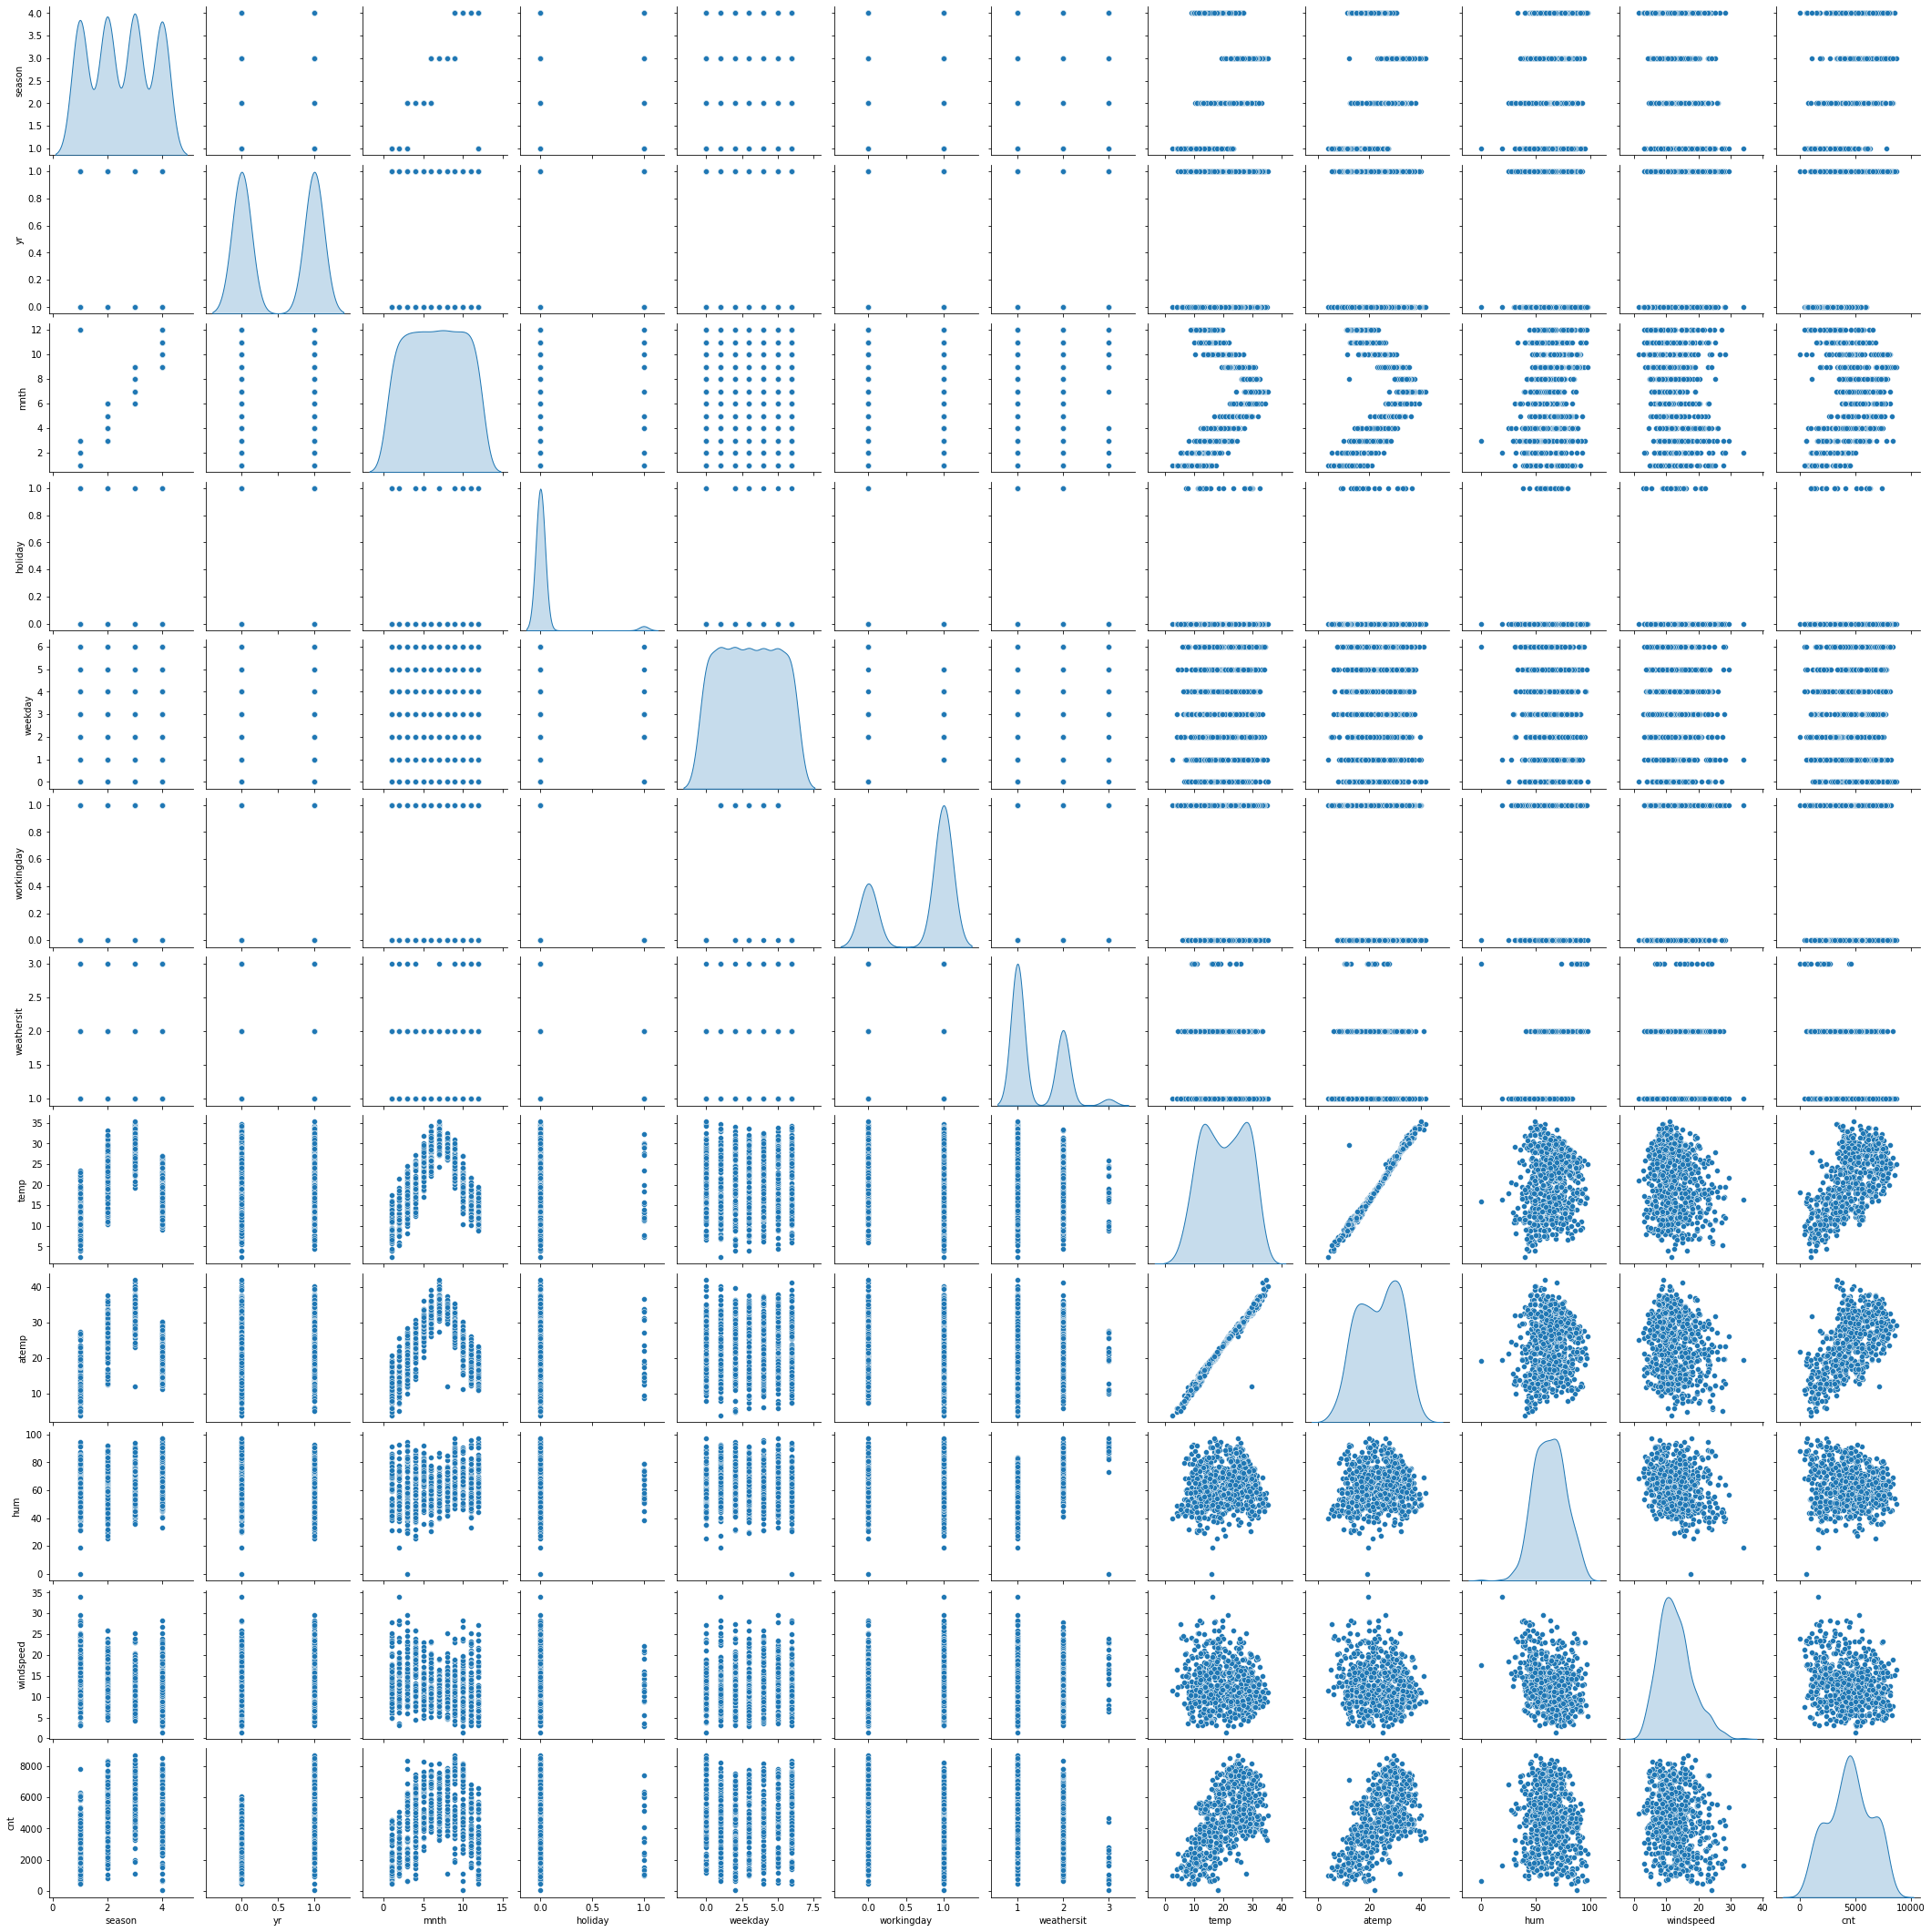

In [19]:
sns.pairplot(data, diag_kind='kde')
plt.show()


In [20]:
# after looking at the data and visualisation temp and atemp are almost identical.
# so we can remove atemp from the dataset
data.drop(['atemp'], axis=1, inplace=True)

In [21]:
#one hot encoding
final_data = pd.get_dummies(data, columns=['season','mnth','weekday','weathersit'], drop_first=True)
final_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [22]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric = ['temp','hum','windspeed','cnt']
final_data[numeric] = scaler.fit_transform(final_data[numeric])

##### About Feature Scaling:
##### Reference: https://sebastianraschka.com/Articles/2014_about_feature_scaling.html

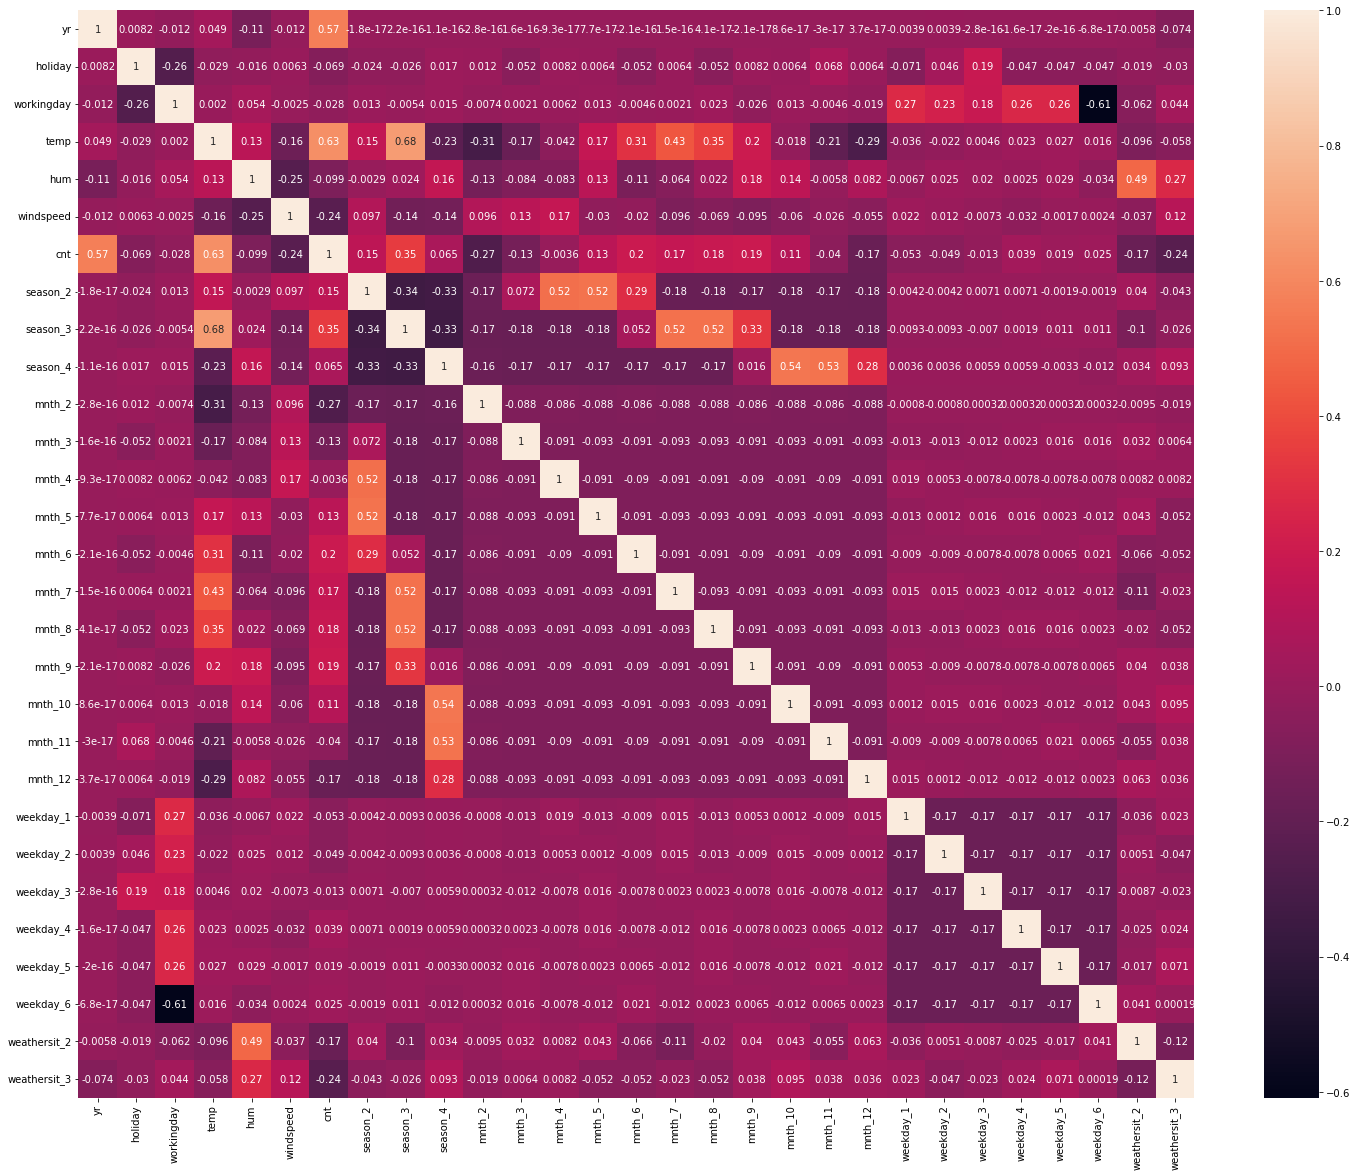

In [23]:
plt.figure(figsize = (25,20))
corr = final_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

#### Observations:
*******
- from here we can get rough idea of which season is more popular (season 3 > season 2 > season 4 > season 1).
- Along with that we can see in which year the demand for shared bikes is highest.(year 1> year 0)
- Between the months of 5-10 there is a demand for shared bikes.
- During working days customers book their bikes.
- In every season when weathersit is 1 it is the most demanding day for shared bikes.  
- Linear relationship between the variables temp and atemp.
- year and temp are highly relatables variables for predicting the demand for shared bikes.
- Multicollinearity between the variables.
****


## Feature Selection
***

In [24]:
df_train = final_data.copy()
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,0.355170,0.828620,0.284606,0.110792,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,0.379232,0.715771,0.466215,0.089623,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0.171000,0.449638,0.465740,0.152669,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0.175530,0.607131,0.284297,0.177174,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0.209120,0.449313,0.339143,0.181546,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### To check and remove the multicollinearity:

In [25]:
x_train = df_train
y_train = df_train.pop('cnt')

In [26]:
# implementing Recursive Feature Elimination with Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=13)
rfe.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=13)

In [27]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 9),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', False, 2),
 ('mnth_6', False, 4),
 ('mnth_7', False, 14),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 11),
 ('mnth_12', False, 12),
 ('weekday_1', False, 15),
 ('weekday_2', False, 16),
 ('weekday_3', False, 10),
 ('weekday_4', False, 7),
 ('weekday_5', False, 8),
 ('weekday_6', False, 13),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [28]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [29]:
# for using stats model we need to store the features 
x_train_rfe = x_train[col]

In [30]:
# VIF Calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif.sort_values(by='VIF')
print(vif)

        features    VIF
0             yr   1.96
1        holiday   1.04
2           temp  22.99
3            hum  15.59
4      windspeed   4.41
5       season_2   3.64
6       season_3   6.96
7       season_4   3.03
8         mnth_3   1.22
9         mnth_9   1.29
10       mnth_10   1.63
11  weathersit_2   2.13
12  weathersit_3   1.21


In [31]:
# implementing stats model
import statsmodels.api as sm
x_train_rfe_sm = sm.add_constant(x_train_rfe)
model = sm.OLS(y_train, x_train_rfe_sm).fit()


In [32]:
model.params

const           0.235298
yr              0.231295
holiday        -0.080815
temp            0.460824
hum            -0.179102
windspeed      -0.163836
season_2        0.138234
season_3        0.087777
season_4        0.158250
mnth_3          0.034111
mnth_9          0.096869
mnth_10         0.061620
weathersit_2   -0.048799
weathersit_3   -0.224004
dtype: float64

In [33]:
print("Summary of the model:")
print(model.summary())


Summary of the model:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     285.6
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          7.78e-273
Time:                        11:38:46   Log-Likelihood:                 726.04
No. Observations:                 730   AIC:                            -1424.
Df Residuals:                     716   BIC:                            -1360.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2353   

so here if p value is greater than 0.05 then we can remove the variable from the model.


## Final Report:
***
- Temperature (temp) - A coefficient value of ‘0.4608’ indicated that a unit increase in temp variable increases the bike hire.
- Year (yr) - A coefficient value of ‘0.2313’ indicated that a unit increase in yr variable increases the bike hire.
- Season4 (Fall) - A coefficient value of ‘0.1582’ indicated that this season is favourable bike hire numbers.

***
Evaluation:
- R^2 Value = 0.838 
***

In [39]:
# from sklearn.model_selection import train_test_split 
# x=final_data.drop("cnt",axis=1)
# y= final_data["cnt"]
# x_train, x_test , y_train , y_test = train_test_split(x,y,train_size= 0.8)

In [40]:
# print(x_train.shape)
# print(x_test.shape)

In [41]:
# from sklearn.linear_model import LinearRegression 
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [42]:
# models=[LinearRegression(),RandomForestRegressor()]
# model_names=['linear Regressor','Randomforest Regressor']
# mean_absolute_error1 = []
# mse=[]
# r2 = []

# d={}
# for model in range (len(models)):
#     clf=models[model]
#     clf.fit(x_train,y_train)
#     test_pred=clf.predict(x_test)
#     mse.append(np.sqrt(mean_squared_error(test_pred,y_test)))
#     r2.append(r2_score(test_pred,y_test))
#     mean_absolute_error1.append(mean_absolute_error(test_pred,y_test))
# d={'Modelling Algo':model_names,'MSE':mse,"R2":r2,"MAE":mean_absolute_error1}

In [43]:
# data = pd.DataFrame(d)
# data